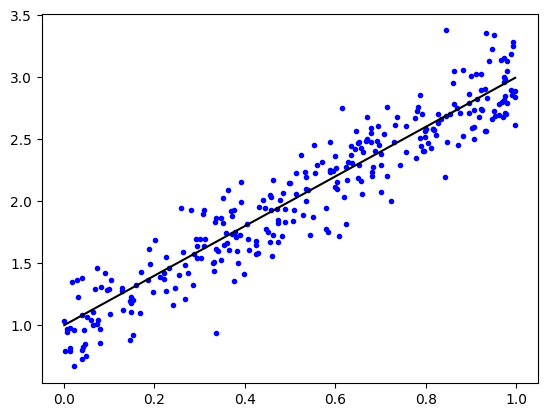

In [1]:
import numpy.random as npr
import jax.numpy as np
from jax import grad
import matplotlib.pyplot as plt

# first generate some random data
X = npr.uniform(0, 1, 300)
true_w, true_b = 2, 1
# add some noise to the labels
Y = X*true_w + true_b + 0.2*npr.randn(300)

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b, color='black')
plt.show()

0.99394536
0.6772454
0.5036943
0.4083624
0.35577703
0.32655865
0.3101193
0.3006743
0.295063
0.29155827
0.2892164
0.28752124
0.28619075
0.28507033
0.28407538
0.28315935
0.28229648
0.2814724
0.2806792
0.27991202
0.2791682
0.2784458
0.27774373
0.27706107
0.2763971
0.2757512
0.27512288
0.27451158
0.27391684
0.27333817
0.27277517
0.27222747
0.27169454
0.271176
0.27067152
0.2701807
0.2697031
0.2692385
0.26878643
0.2683466
0.26791865
0.2675023
0.26709723
0.26670313
0.2663196
0.26594657
0.26558352
0.26523033
0.2648867
0.26455235
0.2642271
0.26391062
0.2636027
0.26330307
0.2630116
0.26272804
0.26245207
0.26218358
0.26192245
0.2616683
0.26142105
0.26118046
0.26094642
0.26071867
0.26049712
0.26028153
0.26007178
0.2598677
0.25966918
0.25947604
0.25928804
0.25910518
0.2589273
0.25875416
0.25858578
0.25842193
0.25826246
0.25810733
0.25795642
0.25780958
0.25766674
0.25752774
0.2573925
0.2572609
0.2571329
0.25700834
0.25688714
0.25676924
0.25665453
0.2565429
0.25643432
0.25632864
0.25622588
0.25612584

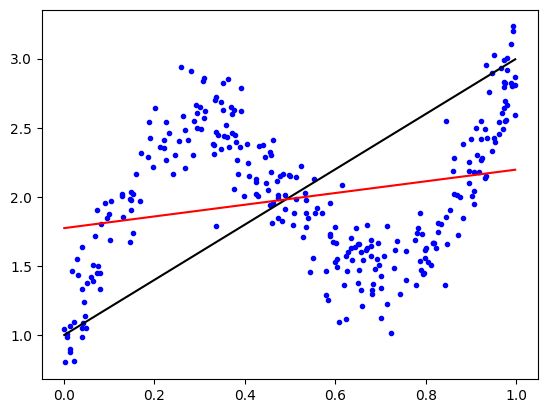

In [7]:
# the linear model
def linear(params, x):
    w,b = params
    return w*x + b

def loss(params, dataset):
    x, y = dataset
    pred = linear(params, x)
    return np.square(pred - y).mean()

# gradient function
loss_grad = grad(loss)

iterations = 1500
step_size = 0.1
dataset = (X, Y)
w, b = 1.5, 2. # initial values for the parameters
for i in range(iterations):
    params = (w, b)
    loss_ = loss(params, dataset)
    # compute gradient w.r.t model parameters
    params_grad = loss_grad(params, dataset)
    # update parameters
    w -= step_size * params_grad[0]
    b -= step_size * params_grad[1]
    print(loss_)

print(params)
    
plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b, color='black')
plt.plot(np.sort(X), linear(params, np.sort(X)), color='red')
plt.show()

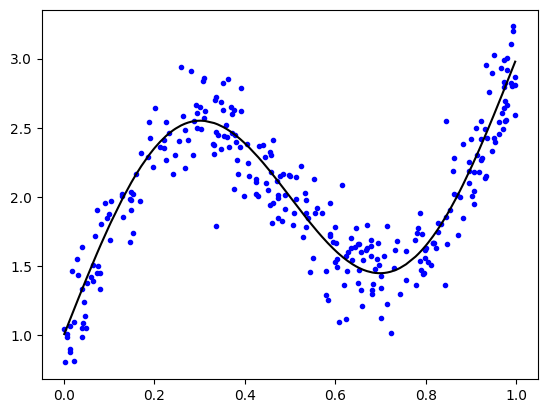

In [3]:
#add some nonlinearity
Y += np.sin(2*np.pi*X)

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.show()

(Array(0.42415887, dtype=float32, weak_type=True), Array(1.7738672, dtype=float32, weak_type=True))


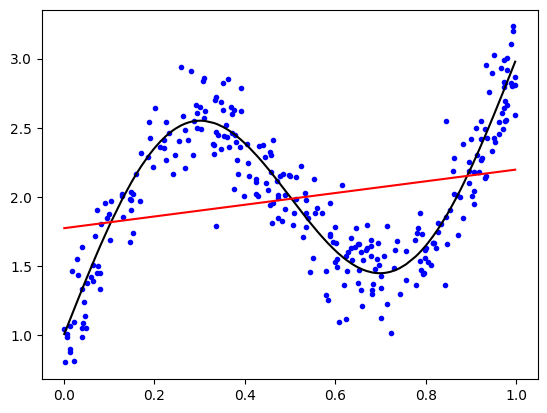

In [4]:
iterations = 500
step_size = 0.1
dataset = (X, Y)
w, b = 1.5, 2. # initial values for the parameters
for i in range(iterations):
    params = (w, b)
    loss_ = loss(params, dataset)
    # compute gradient w.r.t model parameters
    params_grad = loss_grad(params, dataset)
    # update parameters
    w -= step_size * params_grad[0]
    b -= step_size * params_grad[1]
    #print(loss_)

print(params)
    
plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.plot(np.sort(X), linear(params, np.sort(X)), color='red')
plt.show()

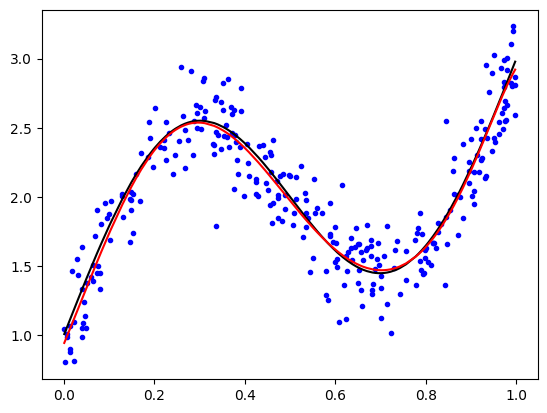

In [5]:
from sklearn import linear_model

idx = np.argsort(X)

# encoder
Z = np.concatenate([X[idx].reshape(-1, 1)**n for n in range(1, 10)], axis=1)

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(Z, Y[idx])

plt.scatter(X, Y, marker='.', color='blue')
plt.plot(np.sort(X),  np.sort(X)*true_w + true_b + np.sin(2*np.pi*np.sort(X)), color='black')
plt.plot(X[idx], reg.predict(Z), color='red')
plt.show()